# Decision tree learning - Entropy & Information Gain
This focuses on how decision trees actually decide which feature to split on.
I wanted to understand **entropy** and **information gain** properly - not just as formulas, but as the logic behind how a tree "thinks" when building itself.

In [1]:
import numpy as np
import pandas as pd
import math

### Dataset: "Play Tennis"

This is the **PlayTennis** dataset that most decision tree examples use.
Each row represents a day and the features describing the weather conditions.
The target column 'PlayTennis' tells us if we played tennis('Yes') or not ('No').

The goal of a decision tree is to find **which questions (feature)** best splits the data into consistent groups so that each group mostly has one class.

In [2]:
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Step 1: Calculating Entropy (Uncertainty)

**Entropy** measures how mixed up the data is.  
If a dataset has both “Yes” and “No” outcomes evenly → high entropy (uncertain).  
If it’s mostly one label → low entropy (more certain).

This function follows the formula:

\[
H(Y) = -\sum P(y_i) \log_2 P(y_i)
\]

We:
1. Count the proportion of each class  
2. Multiply by log₂ of that probability  
3. Take the negative sum

In [3]:
def entropy(column):
    values, counts = np.unique(column, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

In [4]:
entropy(df['PlayTennis'])

np.float64(0.9402859586706311)

This gives the entropy of our target column *before any split*.  
It tells us how uncertain the dataset is right now.

If you get around **0.94**, it means our dataset is fairly mixed — there’s still a lot to “learn” from the features.


### Step 2: Conditional Entropy (After Splitting)

Now we check what happens **after we split** the dataset by one feature, like “Outlook”.

Each value (Sunny, Rain, Overcast) creates a smaller subset of data.
We calculate the entropy for each subset and take the **weighted average** because some subsets are bigger than others.

This represents the *remaining uncertainty* **after** using that feature.

In [5]:
def conditional_entropy(feature_col, target_col):
    values, counts = np.unique(feature_col, return_counts=True)
    total = np.sum(counts)
    weighted_entropy = 0
    
    for i in range(len(values)):
        subset = target_col[feature_col == values[i]]
        weighted_entropy += (counts[i] / total) * entropy(subset)
    
    return weighted_entropy

### Step 3: Information Gain

Information Gain (IG) tells us **how much uncertainty was removed** after we split by a feature.

\[
IG(Y, X) = H(Y) - H(Y|X)
\]

If a feature reduces entropy a lot → high information gain → it’s a *good question* for the decision tree to ask.

In [6]:
def information_gain(feature_col, target_col):
    total_entropy = entropy(target_col)
    cond_entropy = conditional_entropy(feature_col, target_col)
    return total_entropy - cond_entropy

### Step 4: Compare All Features

Here we loop through every feature and calculate its Information Gain.

The feature with the **highest IG** is the one that splits the dataset best as it creates the purest groups.
In our case, `Outlook` usually wins, which matches the examples from the lecture.

In [7]:
for col in df.columns[:-1]:
    ig = information_gain(df[col], df['PlayTennis'])
    print(f"{col}: {ig:.3f}")

Outlook: 0.247
Temperature: 0.029
Humidity: 0.152
Wind: 0.048


### Step 5: Visualising the Information Gain

This bar chart makes it easy to see which features contribute the most.  
In this dataset, **Outlook** gives the highest Information Gain — meaning the tree will split on it first.

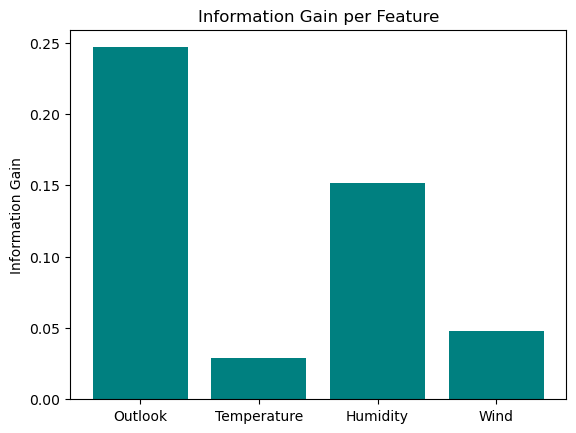

In [8]:
import matplotlib.pyplot as plt

features = df.columns[:-1]
gains = [information_gain(df[col], df['PlayTennis']) for col in features]

plt.bar(features, gains, color='teal')
plt.title('Information Gain per Feature')
plt.ylabel('Information Gain')
plt.show()

- Entropy is like "how uncertain am I right now?"  
- Information Gain is "how much uncertainty did this question remove?"  
- The tree chooses the question (feature) that removes the most uncertainty first.  

That’s how a decision tree *learns* by picking the most informative questions, step by step.